In [1]:
import os
import sys
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from utils.files.file_helper import load_binary_file, save_binary_file
from utils.statistics.correlation import check_correlations

import utils.configuration

import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
config = utils.configuration.Configuration()

In [4]:
MERGED_DATA_LOCATION = config.config['DEFAULT']['MERGED_DATA_LOCATION']
PREPROCESSED_DATA_FILE_BIN = config.config['DEFAULT']['PREPROCESSED_DATA_FILE_BIN']

In [5]:
data = load_binary_file(MERGED_DATA_LOCATION, PREPROCESSED_DATA_FILE_BIN)

## Describing data

### Overall data info

In [6]:
data.describe()

,month,day_of_week,quarter,crs_dep_time,diverted,origin_awnd,origin_snow,origin_snwd,dest_awnd,dest_snow,dest_snwd,origin_fog,origin_hail,origin_damaging_wind,dest_fog,dest_hail,dest_damaging_wind
count,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07
mean,6.550206e+00,3.932943e+00,2.517417e+00,1.329608e+03,2.369142e-03,1.960412e+01,3.926531e-02,6.464322e+00,1.960419e+01,3.927173e-02,6.465322e+00,2.959791e-01,1.228711e-02,8.282551e-03,2.959768e-01,1.229361e-02,8.281665e-03
std,3.399145e+00,1.995226e+00,1.104883e+00,4.897529e+02,4.861614e-02,1.981412e+01,1.942255e-01,4.881155e+01,1.981421e+01,1.942407e-01,4.882173e+01,4.564816e-01,1.101641e-01,9.063085e-02,4.564806e-01,1.101929e-01,9.062604e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.000000e+00,2.000000e+00,9.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,4.000000e+00,3.000000e+00,1.321000e+03,0.000000e+00,1.875000e+01,0.000000e+00,0.000000e+00,1.875000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,6.000000e+00,3.000000e+00,1.735000e+03,0.000000e+00,3.233333e+01,0.000000e+00,0.000000e+00,3.233333e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,7.000000e+00,4.000000e+00,2.359000e+03,1.000000e+00,3.816667e+02,1.000000e+00,1.219000e+03,3.816667e+02,1.000000e+00,1.219000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Correlations

In [7]:
data.corr()

,month,day_of_week,quarter,crs_dep_time,diverted,origin_awnd,origin_snow,origin_snwd,dest_awnd,dest_snow,dest_snwd,origin_fog,origin_hail,origin_damaging_wind,dest_fog,dest_hail,dest_damaging_wind
month,1.000000,0.020738,0.970483,-0.001463,-0.002357,-0.080756,-0.069920,-0.124017,-0.080755,-0.069948,-0.124022,0.019534,-0.051974,-0.020795,0.019542,-0.051949,-0.020837
day_of_week,0.020738,1.000000,0.012949,0.006960,-0.000241,-0.005688,0.001152,-0.000403,-0.005703,0.001169,-0.000367,-0.012979,-0.014520,-0.025757,-0.013100,-0.014538,-0.025769
quarter,0.970483,0.012949,1.000000,-0.001650,-0.002031,-0.081025,-0.076318,-0.127252,-0.081025,-0.076342,-0.127264,0.019979,-0.052670,-0.022254,0.019995,-0.052631,-0.022300
crs_dep_time,-0.001463,0.006960,-0.001650,1.000000,0.000585,-0.010883,-0.007693,-0.005600,0.011368,0.003486,0.010132,0.008123,0.000913,0.002567,-0.005132,-0.001387,-0.002912
diverted,-0.002357,-0.000241,-0.002031,0.000585,1.000000,-0.000957,0.000832,0.001009,-0.002605,0.000526,-0.000491,0.002539,0.000449,0.000756,0.013157,0.008849,0.004207
origin_awnd,-0.080756,-0.005688,-0.081025,-0.010883,-0.000957,1.000000,0.213827,0.082075,0.216859,0.063465,0.040104,0.388265,0.127486,0.155942,0.091355,0.043642,0.056299
origin_snow,-0.069920,0.001152,-0.076318,-0.007693,0.000832,0.213827,1.000000,0.296887,0.063351,0.137815,0.074193,0.175354,0.239729,0.095495,0.020332,0.037566,0.025525
origin_snwd,-0.124017,-0.000403,-0.127252,-0.005600,0.001009,0.082075,0.296887,1.000000,0.040173,0.074275,0.106033,0.044484,0.052051,0.012752,0.018967,0.021002,0.018283
dest_awnd,-0.080755,-0.005703,-0.081025,0.011368,-0.002605,0.216859,0.063351,0.040173,1.000000,0.213864,0.082080,0.091193,0.043648,0.056249,0.388222,0.127525,0.155916
dest_snow,-0.069948,0.001169,-0.076342,0.003486,0.000526,0.063465,0.137815,0.074275,0.213864,1.000000,0.296941,0.020315,0.037581,0.025520,0.175340,0.239704,0.095516


In [8]:
check_correlations(data)

month-->quarter: r^2=0.970483


## Plotting data

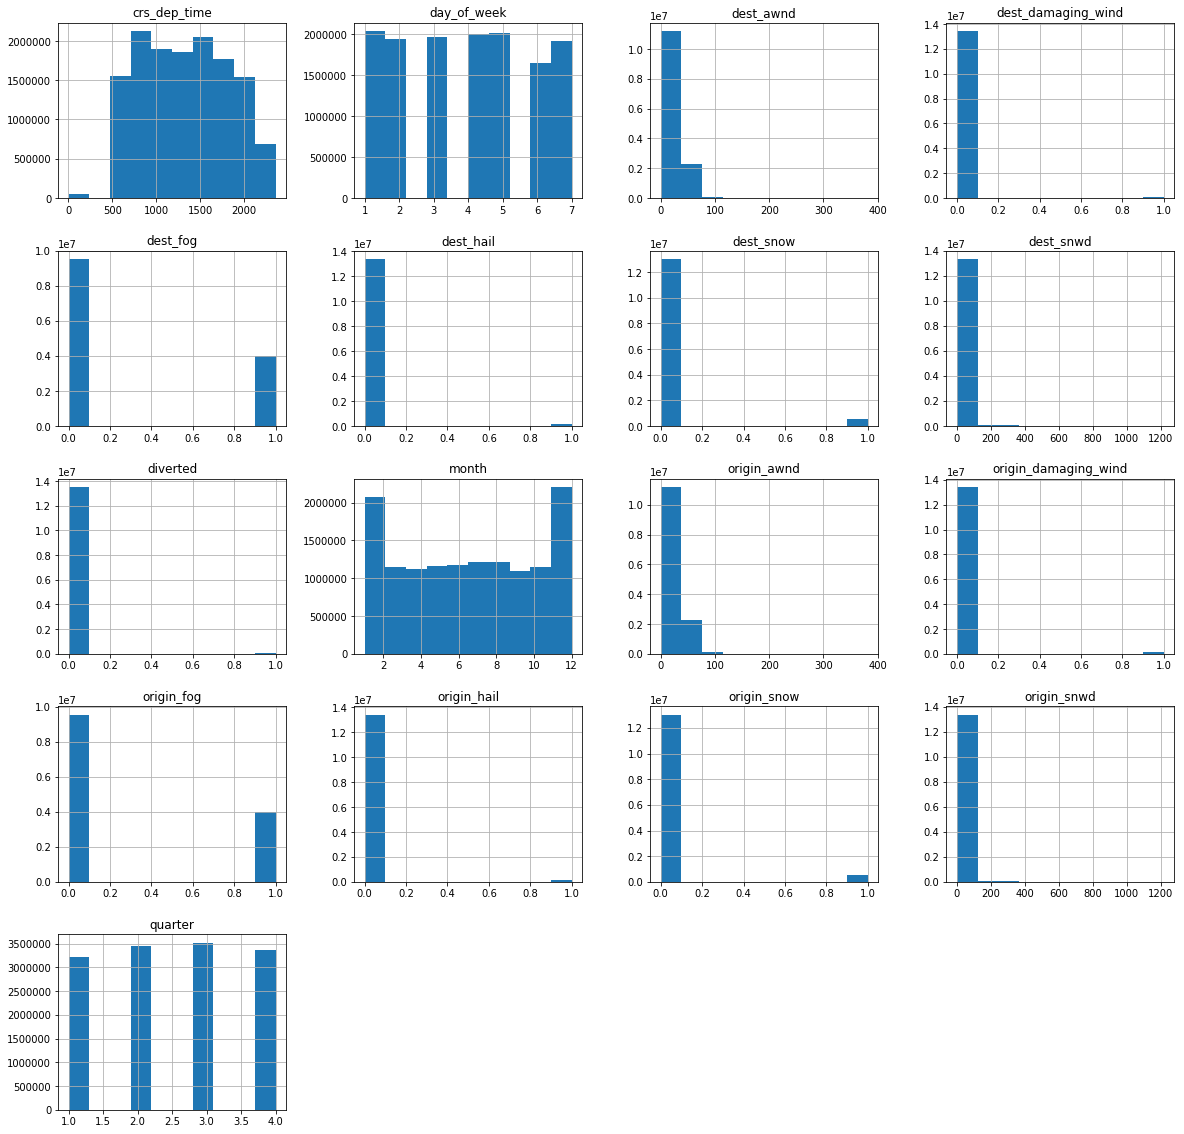

In [9]:
data.hist(figsize=(20, 20));

### Plotting classes

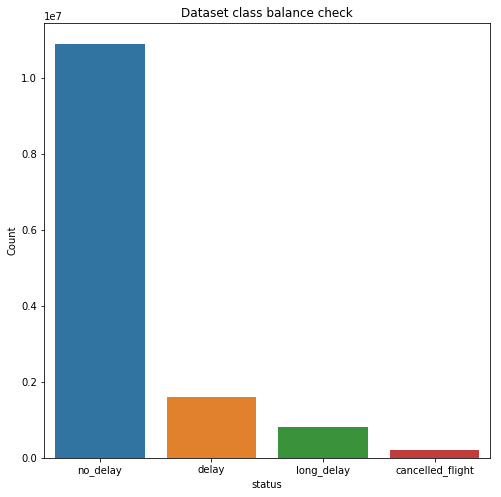

In [10]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x = data.status)
ax.set_title('Dataset class balance check')
ax.set_ylabel('Count')
plt.show()

### Day / delay plot

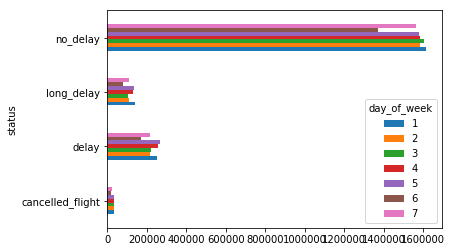

In [17]:
data.groupby('day_of_week').status.value_counts().unstack(0).plot.barh()


### Month / Delay plot

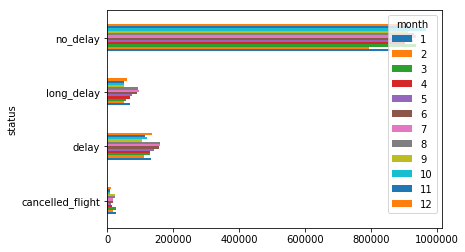

In [18]:
data.groupby('month').status.value_counts().unstack(0).plot.barh()

### Flights per airline plot

In [13]:
airlines_group = data[['status', 'op_unique_carrier']]
airlines_group_num = airlines_group.groupby(['op_unique_carrier']).size()
airlines_group = data[['status', 'op_unique_carrier']]
airlines_group = airlines_group[airlines_group['status'] != 'no_delay']
airlines_group_delays_num = airlines_group.groupby(['op_unique_carrier']).size()
delay_info = pd.DataFrame({'Carrier': np.unique(airlines_group.op_unique_carrier.values), \
                           'Number of flights': airlines_group_num.values, \
                           'Number of delays': airlines_group_delays_num.values})

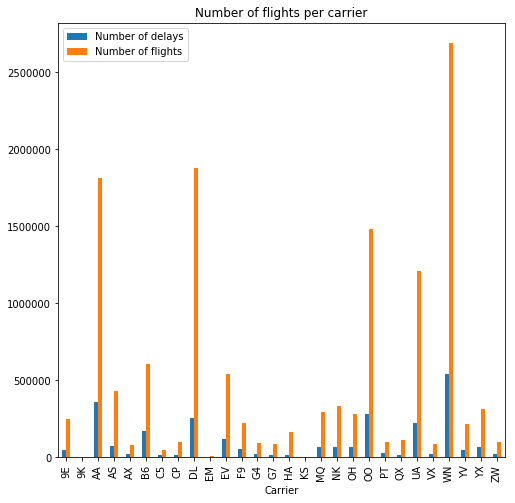

In [14]:
delay_info.plot(kind='bar', figsize=(8, 8), title = 'Number of flights per carrier', x='Carrier')

### Delay ratings

In [15]:
delay_info_rating = delay_info.copy()
delay_info_rating['Delay index'] = delay_info['Number of delays'] / delay_info['Number of flights']

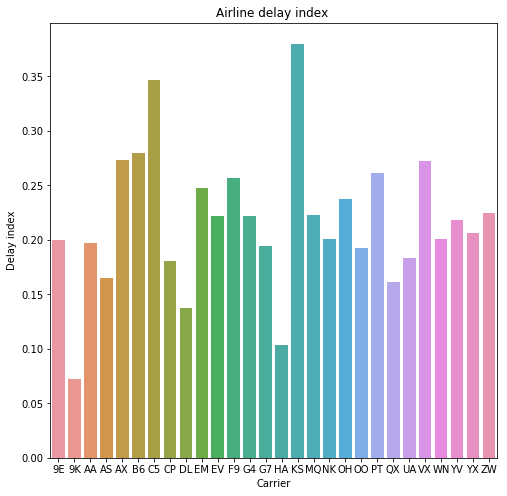

In [16]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x="Carrier", y="Delay index", data=delay_info_rating)
ax.set_title('Airline delay index ')
plt.show()